# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

***Описание данных***

children — количество детей в семье

days_employed — общий трудовой стаж в днях

dob_years — возраст клиента в годах

education — уровень образования клиента

education_id — идентификатор уровня образования

family_status — семейное положение

family_status_id — идентификатор семейного положения

gender — пол клиента

income_type — тип занятости

debt — имел ли задолженность по возврату кредитов

total_income — ежемесячный доход

purpose — цель получения кредита


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [ ]:
import pandas as pd
# <открытие файла для чтения и вывод первых 5-ти строк>
df = pd.read_csv('/datasets/data.csv')
display(df.head())



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [ ]:
# <Получим общую информацию о данных в таблице>
df.info()
#df.describe()
print('----------------------------------')
print('Явных дубликатов в таблице:', (df.duplicated().sum()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
----------------------------------
Явных дубликатов в таблице: 54


In [ ]:
# Создадим функцию для замены отрицательных чисел на положительные:
def negative_to_pozitive(value):
    if value < 0:
        value *= -1
        return value
    else:
        return value
    
#<Применим функцию для столбца 'days_employed'>
df['days_employed'] = df['days_employed'].apply(negative_to_pozitive)

# <вывод на экран>
# display(df['days_employed'].sort_values(ascending=False).head(30))
# display(df.sort_values(by = 'days_employed', ascending=False).head(3444))
# df.sort_values('dob_years')


In [ ]:
# < определим все уникальные значения в каждом столбце>
for column in df:
    print(df[column].unique())
#    print(df[row].value_counts())


[ 1  0  3  2 -1  4 20  5]
[8437.67302776 4024.80375385 5623.42261023 ... 2113.3468877  3112.4817052
 1984.50758853]
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
[0 1 2 3 4]
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
[0 1 2 3 4]
['F' 'M' 'XNA']
['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']
[0 1]
[253875.6394526  112080.01410244 145885.95229686 ...  89672.56115303
 244093.05050043  82047.41889948]
['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение с

***Вывод***
    
Столбец "children"содержит ошибочные значения равные '20' и '-1'. Количество не может быть отрицательным, 

Столбец "days_employed" содержит артефакты и отрицательные значения.

Столбец "dob_years". Значений равных "0" = 101,высока вероятность, что так передаются пропущенные значения. Возраст не может быть "0", так как кредиты банками выдаются с 18-ти лет. Доля пропущеных значений в столбце составляет менее 1 % от всех значений датафрейма. 

Столбец "education". Нявные дубликаты в названиях. Привести к единому регистру.

Столб  "education_id". количество категорий 5 (от 0 до 4) с точки зрения статистики, эти значения не будут количественными. Числа в этом столбце обозначают категории, и всего их пять.

Столбец "family_status". количество категорий 5 

Столбец "family_status_id". количество категорий 5 (от 0 до 4)

Столбец "gender". F - 14236, M - 7288, XNA - 1. Присутствует строка с пропущенными данными.

Столбец "income_type".Привети к нижнему регистру. 

Столбец "purpose". Много дубликатов с похожими или идентичными целями. Лемматизация.

Столбец "total_income". Пропущенные значения (2174)

Столбец "days_employed". Пропущенные значения (2174)


В доходе пропуски заменили на медианное значение. 


Поскольку количество детей в столбце "children" - величина абсолютная, заменим отрицательное значение на положительное. 

Число 20 в столбце заменим на 2, так как вероятность человеческого фактора достаточно высока, учитывая близкое расположение на клавиатуре цифр "2" и "0",медиана по количеству детей = 2,5 и наличие 2 детей более частое явление чем наличие 3-х.  

In [ ]:
# <Применим функцию negative_to_pozitive для замены отрицательного значения в'children'>
df['children'] = df['children'].apply(negative_to_pozitive)

df['children'] = df['children'].replace(20,2)
display(df['children'].value_counts())

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [ ]:
# <Исключим из выборки строку с пропущеным значением по колонне 'gender'>

df = df[df['gender'] != 'XNA']

display(df[df['gender'] == 'XNA'])


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


## Шаг 2. Предобработка данных

### Обработка пропусков

In [ ]:
# # <Замена значения 0 в 'dob_years'>
# dob_years_mean = int(df['dob_years'].mean())
# print('Среднее значение по возрасту -', dob_years_mean)

# df['dob_years'] = df['dob_years'].replace(0,dob_years_mean).astype('int')
# display(df['dob_years'].value_counts().head())

dob_years_mean_by_income_type = df.groupby('income_type')['dob_years'].median()
display(pd.DataFrame(dob_years_mean_by_income_type))

for inc_type, years in dob_years_mean_by_income_type.iteritems():
    df.loc[(df['income_type'] == inc_type) & (df['dob_years'] == 0), 'dob_years'] = years   

#<Проверка на наличие значений равных "0". Для имеющихся значений должна вернуть 'True'.>
print('________________________________')
print('Проверка на наличие значений равных "0"')
print((df['dob_years'] == 0).value_counts())

,dob_years
income_type,
безработный,38.0
в декрете,39.0
госслужащий,40.0
компаньон,39.0
пенсионер,60.0
предприниматель,42.5
сотрудник,39.0
студент,22.0


________________________________
Проверка на наличие значений равных "0"
False    21524
Name: dob_years, dtype: int64


In [ ]:
print(df.query('total_income.isnull()')[['days_employed', 'total_income']].sum())
print('')
print('Общее количество пропущеных строк по "total_income"-', len(df[df['total_income'].isna()]))


days_employed    0.0
total_income     0.0
dtype: float64

Общее количество пропущеных строк по "total_income"- 2174


In [ ]:
#<Посчитатем медиану заработной платы по каждому типу дохода>
median_income_type = df.groupby('income_type')['total_income'].median()
display(median_income_type)
# print(type(median_income_type))
# print('Median_income_type-', median_income_type[5])

# заменим пропущеные значения на 0
# df['total_income'] = df['total_income'].fillna(0)
# df.loc[(df['total_income'] == 0) & (['income_type'] == 'предприниматель')] = df.groupby('income_type')['total_income'].median()[5]
# df[df['total_income'] == 'предприниматель'] = df[df['total_income'] == 'предприниматель'].fillna(median_income_type[0])

# <Заменим пропущенные значения колонки 'total_income' на значение медианы>
# for i in median_income_type.iteritems():
#     category = i[0]
#     value = i[1]
#     df[(df['income_type'] == category)] = df[(df['income_type'] == category)].fillna(value)


income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172319.266339
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [ ]:
# <Для заполнения пропусков в колонке 'total_income' расчитаем медиану и заменим на неё пропущенные значения>
median_total_incom = df['total_income'].median()
print('Median_total_incom -', median_total_incom)
df['total_income'] = df['total_income'].fillna(median_total_incom)
print('Общее количество пропущеных строк по "total_income"-', len(df[df['total_income'].isna()]))

Median_total_incom - 145011.70929552132
Общее количество пропущеных строк по "total_income"- 0


In [ ]:

print(df.query('total_income.isnull()')[['days_employed', 'total_income']].sum())
print('')
print('Общее количество пропущеных строк по "days_employed"-', len(df[df['days_employed'].isna()]))


days_employed    0.0
total_income     0.0
dtype: float64

Общее количество пропущеных строк по "days_employed"- 2174


In [ ]:
# <Заменим пропущенные значения колонки 'days_employed'>

# print('Min значение по стажу -', df['days_employed'].min())
print('Max значение по стажу -', df['days_employed'].max())
# print('Среднее значение по стажу -', df['days_employed'].mean())
print('Медиана по стажу -', df['days_employed'].median())

retiree =df[df['income_type'] == 'пенсионер']
display(retiree.count())

#display(df.groupby('income_type')['debt'].count())
#df['days_employed'] = df['days_employed'].fillna(days_employed_mean)

def  ages_grouping(ages):
      
    if ages <= 30:
        return 'до 30 лет вкл.'
    
    if ages <= 40 and ages > 30:
        return '31-40 лет вкл.'

    if ages <= 55 and ages > 40:
        return '41-55 лет вкл.'
    
    if ages <= 80 and ages > 55:
        return '56-80 лет вкл.'

df['age_group'] = df['dob_years'].apply(ages_grouping)
# display(df.head())


# <Заменим пустые значения на 0 >
df['days_employed'] = df['days_employed'].fillna(0)
#df = df.fillna(0)
# display(df.head())
print('_______________________')
df.groupby('age_group')['days_employed'].median()[0:4]
 
# df.loc[(df['age_group'] == 'до 30 лет вкл.') & (df['days_employed'] == 0 )] = df.groupby('age_group')['days_employed'].mean()[0]
# display(df['days_employed'].head())
# display(df.head(12))


Max значение по стажу - 401755.40047533
Медиана по стажу - 2194.218767670908


children            3856
days_employed       3443
dob_years           3856
education           3856
education_id        3856
family_status       3856
family_status_id    3856
gender              3856
income_type         3856
debt                3856
total_income        3856
purpose             3856
dtype: int64

_______________________


age_group
31-40 лет вкл.      1412.031728
41-55 лет вкл.      2110.703906
56-80 лет вкл.    341240.834401
до 30 лет вкл.       937.517764
Name: days_employed, dtype: float64

In [ ]:
print('Общее количество пропущеных строк по "total_income"-', len(df[df['total_income'].isna()]))
print('')
print('Общее количество пропущеных строк по "days_employed"-', len(df[df['days_employed'].isna()]))


Общее количество пропущеных строк по "total_income"- 0

Общее количество пропущеных строк по "days_employed"- 0


**Вывод**

Из 21525 строк 3443 значения по стажу в днях - большие положительные числа(328 728 - 401755 дней) , это 16%. Пропущенных значений по столбцу - 2174,это ещё 10%. Итого - некорректных данных - немногим более 26%. 

Из группировки стажа по типам дохода ('income_type')видно, что из общего числа значений всех колонок (3856) с типом дохода 'пенсионер' выделяется колонка days_employed       3443, где  3443 - большие положительные числа(328 728 - 401755 дней) и  413 пропущенных значений.

Так как для обработки столбца  "days_employed" не достаточно данных ( отсутствует категоризация) о типе стажа ( общий трудовой, страховой, стаж за последние 5 лет и.т.д.), а замена значений расчетным путем приводит к некорректным данным, и "days_employed" не понадобится для проведения анализа в рамках данного проекта, принято решение не менять большие положительные числа, а пропущенные значения заменить на ноль.

### Замена типа данных

In [ ]:
df['total_income'] = df['total_income'].astype('int')
df['days_employed'] = df['days_employed'].astype('int')
display(df.head())


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,41-55 лет вкл.
1,1,4024,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,31-40 лет вкл.
2,0,5623,33.0,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,31-40 лет вкл.
3,3,4124,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,31-40 лет вкл.
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,41-55 лет вкл.


### Обработка дубликатов

In [ ]:
#<Выведем DataFrame на экран>
display(df[df.duplicated()].head())

# <Посчитаем явные дубликаты в df>
print('----------------------------------')
print('Явных дубликатов в таблице:', (df.duplicated().sum()))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
2849,0,0,41.0,среднее,1,женат / замужем,0,F,сотрудник,0,145011,покупка жилья для семьи,41-55 лет вкл.
4182,1,0,34.0,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,145011,свадьба,31-40 лет вкл.
4851,0,0,60.0,среднее,1,гражданский брак,1,F,пенсионер,0,145011,свадьба,56-80 лет вкл.
5557,0,0,58.0,среднее,1,гражданский брак,1,F,пенсионер,0,145011,сыграть свадьбу,56-80 лет вкл.
7808,0,0,57.0,среднее,1,гражданский брак,1,F,пенсионер,0,145011,на проведение свадьбы,56-80 лет вкл.


----------------------------------
Явных дубликатов в таблице: 54


In [ ]:

# <Поиск дубликатов с учётом регистра по столбцам>

display(df['family_status'].value_counts())
display(df['education'].value_counts())
print('-----------------------------')

# <Приведем значения в столбцах к нижнему регистру>
df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()

display(df['education'].value_counts())
print('-----------------------------')
display(df['family_status'].value_counts())
print('-----------------------------')


женат / замужем          12380
гражданский брак          4176
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      667
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

-----------------------------


среднее                15233
высшее                  5260
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

-----------------------------


женат / замужем          12380
гражданский брак          4176
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

-----------------------------


In [ ]:
#<Удалим явные дубликаты используя метод drop_duplicates() с новой индексацией>

df = df.drop_duplicates().reset_index(drop=True)

# <Посчитаем явные дубликаты в df>
print('----------------------------------')
print('Явных дубликатов в таблице:', (df.duplicated().sum()))
print('----------------------------------')
df.info()

----------------------------------
Явных дубликатов в таблице: 0
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 13 columns):
children            21453 non-null int64
days_employed       21453 non-null int64
dob_years           21453 non-null float64
education           21453 non-null object
education_id        21453 non-null int64
family_status       21453 non-null object
family_status_id    21453 non-null int64
gender              21453 non-null object
income_type         21453 non-null object
debt                21453 non-null int64
total_income        21453 non-null int64
purpose             21453 non-null object
age_group           21453 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 2.1+ MB


**Вывод**

### Лемматизация

In [ ]:
# импортируем pymystem3 для лемматизации:

from pymystem3 import Mystem
m = Mystem()

# <Присвоим переменной 'purpose_list' список уникальных значений целей получения кредита>
purpose_list = df['purpose'].unique()
#print(purpose_list)

# импортируем Counter для подсчёта лемматизированных слов в 'purpose_list'
from collections import Counter


lemmas = []

for purpose in purpose_list:
    lemma = m.lemmatize(purpose)
    lemmas += lemma

print(Counter(lemmas))


Counter({' ': 59, '\n': 38, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'подержать': 1, 'со': 1, 'подержанный': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1})


In [ ]:
def purpose_change(purpose):
        if 'авто' in purpose:
            return 'автомобиль'
        if 'недвиж' in purpose or 'жил' in purpose:
            return  'недвижимость'
        if 'свад' in purpose:
            return  'свадьба'
        if 'образов' in purpose:
            return 'образование'
        
cnt = 0
for row in df['purpose']:
    df.loc[cnt, 'purpose'] = purpose_change(row)
    cnt += 1

display(df['purpose'].value_counts())

недвижимость    10810
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose, dtype: int64

### Категоризация данных

По данным ВОЗ, население распределяется по следующим группам : 
    молодые – 9-17 лет; 
    взрослые – 18-44 года (ранняя зрелость – 18-24 года и зрелость – 25-44 года); 
    средний пожилой возраст – 45-64 года; ранняя старость – 65-74 года
    поздняя старость – 75 лет и старше.

Так как кредиты выдаются с 18 лет, категория "молодые" в выборку не попадет.

In [ ]:
# <  >
# создадим словарь, где  ключ -  возрастная группа, а значение - кортеж из интервала лет, удовлетворяющий этой группе.
ages = {
    'взрослые': (18, 44),
    'пожилые': (45, 64),
    'старые': (65, 74),
    'поздняя старость': (75, 999)
}

data = []
for key, value in ages.items():

    category = key
    start = value[0]
    stop = value[1]
    result = df[(df['dob_years'] >= start) & (df['dob_years'] <= stop)]
    days_employed_median = result['days_employed'].median()
    data.append([category, len(result), days_employed_median])

age_categories = pd.DataFrame(data=data, columns=['категория', 'число клиентов', 'медиана стажа'])
display(age_categories)

,категория,число клиентов,медиана стажа
0,взрослые,11787,1248.0
1,пожилые,8771,3445.0
2,старые,894,356483.0
3,поздняя старость,1,1678.0


## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [ ]:

children_debt = pd.DataFrame()

children_debt['borrowers'] = df.groupby('children')['debt'].count()
children_debt['debtors'] = df.groupby('children')['debt'].sum()
children_debt['correlation'] = children_debt['debtors'] / children_debt['borrowers']
display(children_debt.sort_values('correlation', ascending = False))


,borrowers,debtors,correlation
children,,,
4,41,4,0.097561
2,2128,202,0.094925
1,4855,445,0.091658
3,330,27,0.081818
0,14090,1063,0.075444
5,9,0,0.000000


**Вывод**

Зависимость между наличием детей в семье и возвратом кредита в срок очень слабая и не превышает 0,3. Тем не менее, появление детей в семье увеличивает вероятность несвоевременного погашения кредита, хотя в семья с 5 детьми, кредиты оплачивают в срок.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [ ]:
family_status_debt = pd.DataFrame()

family_status_debt['borrowers'] = df.groupby('family_status_id')['debt'].count()
family_status_debt['debtors'] = df.groupby('family_status_id')['debt'].sum()
family_status_debt['correlation'] = family_status_debt['debtors'] / family_status_debt['borrowers']
family_status_debt.sort_values('correlation', ascending = False)


,borrowers,debtors,correlation
family_status_id,,,
4,2810,274,0.097509
1,4150,388,0.093494
0,12339,931,0.075452
3,1195,85,0.071130
2,959,63,0.065693


**Вывод**

Зависимость между семейным положением и возвратом кредита в срок очень слабая и не превышает 0,3.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

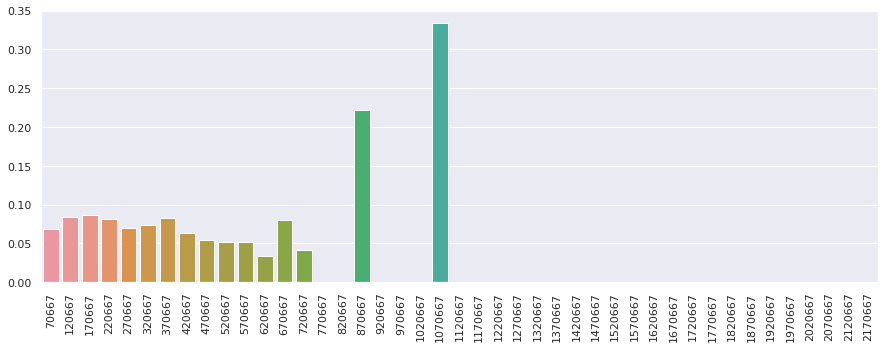

In [ ]:
import seaborn
import matplotlib.pyplot as plt

total_income_debt = pd.DataFrame()
min_income = df['total_income'].min()
max_income = df['total_income'].max()
median_income = df['total_income'].median()
mean_income = df['total_income'].mean()

old_inc = 0
income_categories = []
debt_values = []

for inc in range(min_income, max_income, 50000):
    
    incomers = df[(df['total_income'] >= old_inc) & (df['total_income'] <= inc)]
    grouped_debt = incomers['debt'].sum()
    
    try:
        correlation = int(grouped_debt) / len(incomers)
    except:
        correlation = 0
        
    old_inc = inc
    income_categories.append(inc)
    debt_values.append(correlation)

seaborn.set(rc={'figure.figsize':(15,5)})
plt.setp(seaborn.barplot(x=income_categories[1:-1], y=debt_values[1:-1]).get_xticklabels(), rotation=90);



**Вывод**

Из диаграммы видно, что возникновение просрочки кредита от уровня дохода почти не зависит. Коэффициенты корреляции в подгруппах не превышают 0.3.

- Как разные цели кредита влияют на его возврат в срок?

In [ ]:
purpose_debt = pd.DataFrame()

purpose_debt['borrowers'] = df.groupby('purpose')['debt'].count()
purpose_debt['debtors'] = df.groupby('purpose')['debt'].sum()
purpose_debt['correlation'] = purpose_debt['debtors'] / purpose_debt['borrowers']
purpose_debt.sort_values('correlation', ascending = False)


,borrowers,debtors,correlation
purpose,,,
автомобиль,4306,403,0.093590
образование,4013,370,0.092200
свадьба,2324,186,0.080034
недвижимость,10810,782,0.072340


**Вывод**

Люди с большей вероятностью выплачивают кредит в срок  если он взят на операции с недвижимостью или на свадьбу. 

## Шаг 4. Общий вывод

<div style="border:solid rgba(80,0,240,0.5) 3px; padding: 20px">
    Мы ответили на три вопроса о зависимости между семейным положением, наличием детей, цели кредита и возвратом кредита в срок. Во всех трех случаях коэффициент зависимости менее 0.3, что говорит о слабой, не тесной связи данных факторов со своевременной оплатой кредита. Однако, небольшая корреляция все же прослеживается:

люди с большей вероятностью выплачивают кредит в срок если он взят на операции с недвижимостью или на свадьбу;

люди с доходом 120-371 тыс руб. менее дисциплинированные по сравнению с другими группами; 

появление детей в семье увеличивает вероятность несвоевременного погашения кредита, хотя в семья с 5 детьми, кредиты оплачивают в срок.
    
    Данное исследование требует расширения объема исходных данных и дополнительной детализации по типам дохода в месяц. Текущий набор недостаточно объемен, содержит большое (более 26%) количество пропусков и некорректных значений.
  
</div>


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.